In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

AssertionError: ignored

In [18]:
train_df = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [19]:
train_df.head(10)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665


In [20]:
print(len(train_df))

34250


In [21]:
print(len(train_df['label_group'].unique()))


11014


In [22]:
labelGroup_df = train_df.groupby('label_group')

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

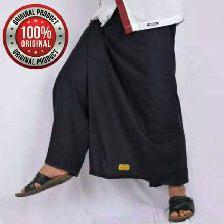

In [26]:
# load sample image
from keras.preprocessing import image
image.load_img("/content/drive/MyDrive/train_images/1d7aadc7503b2b4539cc9a5fe41979dd.jpg", target_size=(224, 224))

In [27]:
%matplotlib inline


groupCount = 0
for groupName,groupDf in labelGroup_df:
    print(groupName)
    imgCount=0
    for index,row in groupDf.iterrows():
        print(row['title'])
        imagePath = '/content/drive/MyDrive/MyDrive/train_images/'+row['image']
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
        imgCount= imgCount+1
        if (imgCount==3):
            break
            
    groupCount = groupCount +1
    if (groupCount==10):
        break

258047
Sarung celana wadimor original 100% dewasa dan anak hitam dan putih polos


FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split


y = train_df.pop('label_group')
X = train_df

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.4,random_state=0)

![image.png](attachment:image.png)

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('stsb-distilbert-base')
model.max_seq_length = 128


In [ ]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.MobileNet(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )


In [ ]:
def get_textEmbeddings(model,text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    return text_embedding

In [ ]:
def get_imageEmbeddings(model,imagePath):
    image = tf.keras.preprocessing.image.load_img(imagePath,target_size= size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings,axis =0)
    meanImgEmb2 = np.mean(meanImgEmb1,axis=0)
    meanImgEmb = np.mean(meanImgEmb2,axis=0)
    return meanImgEmb

In [ ]:
print(np.shape(X_train))

In [ ]:
import time
text_embeddings={}
image_embeddings={}
start_time = time.time()
for index,row in  X_train.iterrows():
    txt_emb = get_textEmbeddings(model,str(row[3]))
    imagePath = '/content/drive/MyDrive/Colab Notebooks/CSPC 4830/Final/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    text_embeddings[row[0]] = txt_emb
    image_embeddings[row[0]] = img_emb
end_time = time.time()
print(str(end_time-start_time))

    

In [ ]:
import pickle
with open('./textEmb','wb') as handle:
    pickle.dump(text_embeddings,handle)
with open('./imgEmb','wb') as handle:
    pickle.dump(image_embeddings,handle)

In [ ]:
keyList=[]
cembList=[]
imageList=[]
titleList=[]
for index, row in X_train.iterrows():
    #start_time=time.time()
    txt_emb = text_embeddings[row[0]]
    print(np.shape(txt_emb))
    img_emb = image_embeddings[row[0]] 
    print(np.shape(img_emb))
    cmb_emb = np.concatenate((txt_emb,img_emb),axis=0)
    print(np.shape(cmb_emb))
    norm = np.linalg.norm(cmb_emb)
    cmb_emb_normal = cmb_emb/norm
    keyList.append(row[0])
    cembList.append(cmb_emb_normal)
    imageList.append(row[1])
    titleList.append(row[3])

In [ ]:
from sklearn.neighbors import NearestNeighbors
kneigh = NearestNeighbors(n_neighbors=5,leaf_size=5000,algorithm='kd_tree')
kneigh.fit(cembList)

In [ ]:
def getNeighbours(query_emb):
    posting_id_list=[]
    neigh_dist,neigh_ind = kneigh.kneighbors(X=query_emb.reshape(1,-1), n_neighbors=5, return_distance=True)
    for ind in neigh_ind:
        #print(str(ind))
        for ind1 in ind:
            posting_id_list.append(str(ind1))
    return posting_id_list

In [ ]:
postingidList=[]
matchesList=[]
index =0
for val in keyList:
    query_emb = cembList[index]
    postingid_list = getNeighbours(query_emb)
    postingidList.append(val)
    matchesList.append(" ".join(postingid_list))
    index =index +1 
    if index==100:
        break

    

In [ ]:
%matplotlib inline
index =0
for item in postingidList:
    print(titleList[index])
    print(keyList[index])
    imagePath = 'd:/shopee-product-matching/train_images/'+ imageList[index]
    pil_im = Image.open(imagePath, 'r')
    plt.figure()
    plt.imshow(pil_im)
    plt.show()
    matching_indices = matchesList[index].split(' ')
    print('==================')
    for ind in matching_indices:
        print(titleList[int(ind)])
        print(keyList[int(ind)])
        imagePath = 'd:/shopee-product-matching/train_images/'+ imageList[int(ind)]
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
    index= index +1
    if index == 10:
        break
    

In [ ]:
testkeyList=[]
testcembList=[]
testimageList=[]
testtitleList=[]
for index, row in X_test.iterrows():
    #start_time=time.time()
    txt_emb = get_textEmbeddings(model,str(row[3]))
    imagePath = 'd:/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    text_embeddings[row[0]] = txt_emb
    image_embeddings[row[0]] = img_emb
    cmb_emb = np.concatenate((txt_emb,img_emb),axis=0)
    norm = np.linalg.norm(cmb_emb)
    cmb_emb_normal = cmb_emb/norm
    testkeyList.append(row[0])
    testcembList.append(cmb_emb_normal)
    testimageList.append(row[1])
    testtitleList.append(row[3])

In [ ]:
testpostingidList=[]
testmatchesList=[]
index =0
for val in testkeyList:
    query_emb = testcembList[index]
    postingid_list = getNeighbours(query_emb)
    testpostingidList.append(val)
    testmatchesList.append(" ".join(postingid_list))
    index =index +1 
    if index==100:
        break

In [ ]:
%matplotlib inline
index =10
while index <20:
    print(testtitleList[index])
    print(testkeyList[index])
    imagePath = 'd:/shopee-product-matching/train_images/'+ testimageList[index]
    pil_im = Image.open(imagePath, 'r')
    plt.figure()
    plt.imshow(pil_im)
    plt.show()
    matching_indices = testmatchesList[index].split(' ')
    print('==================')
    for ind in matching_indices:
        print(titleList[int(ind)])
        print(keyList[int(ind)])
        imagePath = 'd:/shopee-product-matching/train_images/'+ imageList[int(ind)]
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
    index= index +1
   
    